In [1]:

import numpy as np
import pandas as pd 


In [2]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(10, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# compilation of model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7916 - loss: 0.5041 - val_accuracy: 0.7987 - val_loss: 0.4625
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7896 - loss: 0.4680 - val_accuracy: 0.8094 - val_loss: 0.4344
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4452 - val_accuracy: 0.8219 - val_loss: 0.4197
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8180 - loss: 0.4177 - val_accuracy: 0.8238 - val_loss: 0.4122
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.4277 - val_accuracy: 0.8294 - val_loss: 0.4066
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.4130 - val_accuracy: 0.8294 - val_loss: 0.4028
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8299 - loss: 0.3998 - val_accuracy: 0.8306 - val_loss: 0.3981
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.3960 - val_accu

In [22]:
model.layers[0].get_weights()

[array([[ 0.09778404,  0.21012105,  0.2514402 , -0.33190593, -0.06197794,
          0.40944096,  0.1923903 ,  0.07231222,  0.22521193,  0.03909275,
         -0.06864537],
        [ 0.87760365, -0.72769105, -1.0177838 , -0.55854475,  0.36584073,
         -0.26478526, -1.3713682 , -1.0987161 , -0.95244473, -0.05106879,
         -0.31093732],
        [ 0.2810819 , -0.0810287 , -0.2819513 ,  0.5246797 ,  0.16621499,
         -0.34669432,  0.44622824, -0.04210696,  0.00226369,  0.01490464,
          0.16301428],
        [ 0.29497644,  0.17190538,  0.13163076,  0.351063  ,  0.06612334,
         -0.16727091, -0.77302283,  0.07794481, -0.07680111,  0.6296541 ,
         -0.03298129],
        [ 0.06402189, -0.48983932, -0.53547525, -0.21694781, -0.6206439 ,
         -1.3116276 ,  0.0193211 , -0.07896279, -0.2006853 ,  1.3365488 ,
         -1.7164308 ],
        [ 0.30408704, -0.07308834,  0.25765872, -0.19991358, -0.10503285,
          0.332486  ,  0.3636767 , -0.01073917,  0.1193048 ,  0.0115269

In [23]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
y_pred

array([[0.03688724],
       [0.01560905],
       [0.10738041],
       ...,
       [0.55886436],
       [0.12074596],
       [0.28735107]], dtype=float32)

In [25]:
# sigmoid is probablity so we take 0.5 as threshold
y_pred = np.where(y_pred>0.5, 1, 0)

In [26]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.858

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.7934374809265137,
  0.7943750023841858,
  0.807812511920929,
  0.8112499713897705,
  0.8162500262260437,
  0.819531261920929,
  0.8207812309265137,
  0.8226562738418579,
  0.8270312547683716,
  0.8323437571525574,
  0.8404687643051147,
  0.8435937762260437,
  0.8457812666893005,
  0.8493750095367432,
  0.8529687523841858,
  0.8526562452316284,
  0.8550000190734863,
  0.8557812571525574,
  0.8575000166893005,
  0.858593761920929,
  0.856249988079071,
  0.8581249713897705,
  0.8592187762260437,
  0.8581249713897705,
  0.858593761920929,
  0.8587499856948853,
  0.8581249713897705,
  0.859375,
  0.8604687452316284,
  0.859375,
  0.8604687452316284,
  0.8607812523841858,
  0.8592187762260437,
  0.8600000143051147,
  0.8621875047683716,
  0.8607812523841858,
  0.8615624904632568,
  0.8628125190734863,
  0.8629687428474426,
  0.862500011920929,
  0.86328125,
  0.8615624904632568,
  0.8623437285423279,
  0.8637499809265137,
  0.8618749976158142,
  0.8623437285423279,
  0.860781

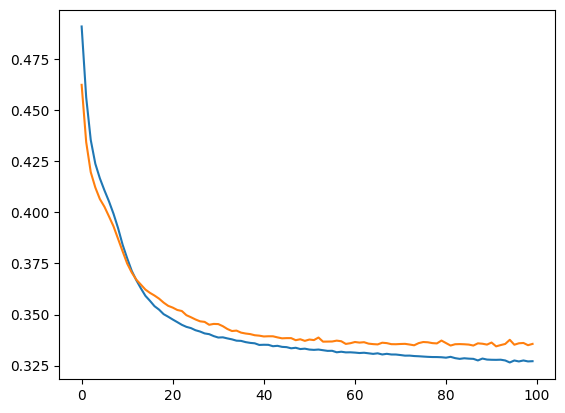

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

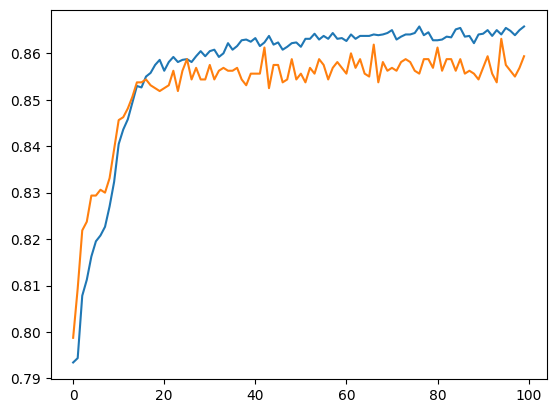

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])